# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?lat={round(lats[i],2)}&lon={round(lngs[i],2)}&appid={weather_api_key}'



    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1


    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 3 of Set 1 | ribeira grande
City not found. Skipping...
Processing Record 4 of Set 1 | korla
City not found. Skipping...
Processing Record 5 of Set 1 | kodiak
City not found. Skipping...
Processing Record 6 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 7 of Set 1 | chokurdakh
City not found. Skipping...
Processing Record 8 of Set 1 | norcasia
Processing Record 9 of Set 1 | porto novo
City not found. Skipping...
Processing Record 10 of Set 1 | hays
Processing Record 11 of Set 1 | bluff
City not found. Skipping...
Processing Record 12 of Set 1 | pangnirtung
City not found. Skipping...
Processing Record 13 of Set 1 | fevik
Processing Record 14 of Set 1 | katherine
City not found. Skipping...
Processing Record 15 of Set 1 | kleck
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          162
Lat           162
Lng           162
Max Temp      162
Humidity      162
Cloudiness    162
Wind Speed    162
Country       162
Date          162
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,norcasia,5.73,-74.89,21.64,91,83,1.55,CO,1674706393
1,hays,39.73,-99.77,-3.13,87,86,3.18,US,1674706395
2,fevik,58.30,8.69,-0.85,76,1,3.94,NO,1674706396
3,kleck,53.08,26.20,-1.38,88,100,2.71,BY,1674706397
4,chikwawa,-15.85,34.77,21.51,97,100,1.24,MW,1674706401


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,norcasia,5.73,-74.89,21.64,91,83,1.55,CO,1674706393
1,hays,39.73,-99.77,-3.13,87,86,3.18,US,1674706395
2,fevik,58.30,8.69,-0.85,76,1,3.94,NO,1674706396
3,kleck,53.08,26.20,-1.38,88,100,2.71,BY,1674706397
4,chikwawa,-15.85,34.77,21.51,97,100,1.24,MW,1674706401


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

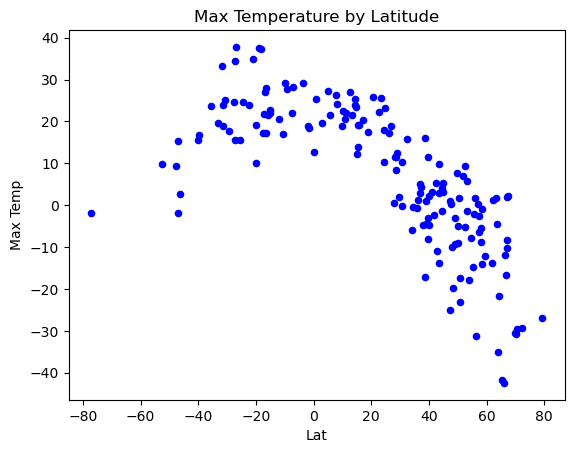

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x='Lat',y='Max Temp', kind="scatter", color='blue')

# Incorporate the other graph properties
plt.title('Max Temperature by Latitude')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

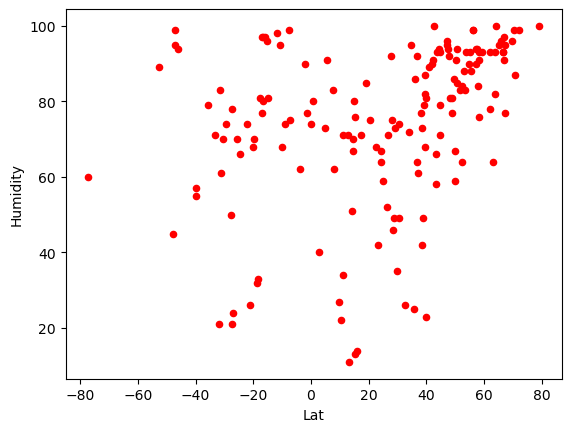

In [14]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x='Lat',y='Humidity', kind="scatter", color='red')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

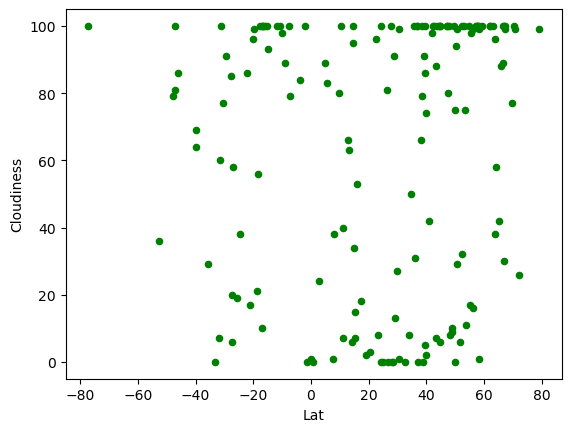

In [16]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x='Lat',y='Cloudiness', kind="scatter", color='grey')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

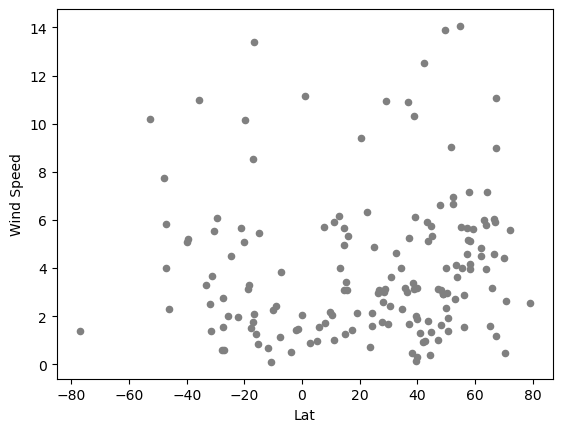

In [18]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x='Lat',y='Wind Speed', kind="scatter", color='green')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_regression(latitudes,weather):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, weather)
    regress_values = latitudes * slope + intercept
    regression_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,norcasia,5.73,-74.89,21.64,91,83,1.55,CO,1674706393
1,hays,39.73,-99.77,-3.13,87,86,3.18,US,1674706395
2,fevik,58.30,8.69,-0.85,76,1,3.94,NO,1674706396
3,kleck,53.08,26.20,-1.38,88,100,2.71,BY,1674706397
5,am timan,10.31,20.50,22.38,22,100,2.05,TD,1674706402


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,chikwawa,-15.85,34.77,21.51,97,100,1.24,MW,1674706401
6,suruc,-31.27,-55.01,23.94,61,100,3.66,UY,1674706406
9,balkanabat,-52.68,-56.62,9.76,89,36,10.21,FK,1674706411
14,aguimes,-11.91,36.52,20.61,98,100,0.67,TZ,1674706418
15,bredasdorp,-35.66,-56.54,23.70,79,29,10.97,AR,1674706419


###  Temperature vs. Latitude Linear Regression Plot

ValueError: x, y, and format string must not be None

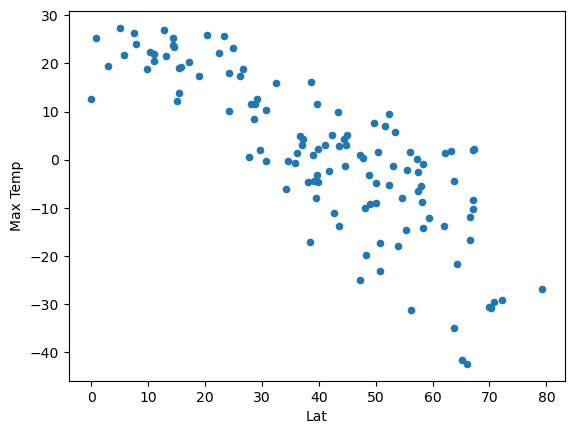

In [28]:
# Linear regression on Northern Hemisphere
north_lats = northern_hemi_df['Lat']
nh_temp_regress = linear_regression(north_lats,northern_hemi_df['Max Temp'])
northern_hemi_df.plot(x='Lat',y='Max Temp',kind='scatter')
plt.plot(north_lats, nh_temp_regress)
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE